# Guía Práctica: Vectorización de Texto con Bag of Words y TF-IDF

**Objetivo de Aprendizaje:** Al finalizar este notebook, serás capaz de:

* Entender la intuición detrás de las técnicas de vectorización Bag of Words (BoW) y TF-IDF.
* Implementar ambas técnicas utilizando la librería scikit-learn.
* Analizar y comparar las representaciones vectoriales resultantes.
* Comprender la importancia de los N-gramas para capturar términos compuestos.

**Contexto:** En el procesamiento de lenguaje natural (PLN), los modelos de machine learning no entienden palabras, entienden números. La vectorización es el proceso fundamental de convertir texto en una representación numérica (vectores) que los algoritmos puedan procesar.

In [ ]:
# Scikit-learn para la vectorización
"""
%pip install scikit-learn -q
%pip install pandas -q
%pip install numpy -q
%pip install matplotlib -q
%pip install seaborn -q
%pip install nltk   -q
%pip install wordcloud -q
%pip install plotly  -q
"""

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# --- 0. PREPARACIÓN DEL ENTORNO ---
# Se importan las librerías necesarias para el análisis.


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # type: ignore

# Pandas para la manipulación y visualización de datos en formato de tabla (DataFrame)
import pandas as pd

# Numpy para operaciones numéricas eficientes
import numpy as np

# Matplotlib y Seaborn para la creación de gráficos
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore

# --- DEFINICIÓN DEL CORPUS ---
# Un corpus es simplemente una colección de documentos de texto.
# Para este ejemplo, usaremos un corpus pequeño y controlado para entender los conceptos.
documentos = [
    "El perro muerde al hombre",
    "El hombre muerde al perro",
    "El perro come carne",
    "El hombre come comida"
]

print("Nuestro corpus de ejemplo:")
for i, doc in enumerate(documentos):
    print(f"Documento {i+1}: {doc}")

Nuestro corpus de ejemplo:
Documento 1: El perro muerde al hombre
Documento 2: El hombre muerde al perro
Documento 3: El perro come carne
Documento 4: El hombre come comida


## Sección 1: Bag of Words (BoW) - La "Bolsa de Palabras"

### 1.1. Explicación Teórica

La técnica Bag of Words es una de las formas más simples e intuitivas de vectorizar texto. Imagina que tomas un documento, metes todas sus palabras en una bolsa, la sacudes y luego haces un inventario de cuántas veces aparece cada palabra.

**Características principales:**

*   **Ignora el orden:** No le importa la gramática ni el orden de las palabras, solo su frecuencia. De ahí el nombre "bolsa".
*   **Crea un vocabulario:** Primero, inspecciona todo el corpus para crear un diccionario de todas las palabras únicas que existen.
*   **Vectoriza por conteo:** Cada documento se representa como un vector donde cada posición corresponde a una palabra del vocabulario, y el valor en esa posición es el número de veces que la palabra aparece en el documento.

**Analogía:** Si el vocabulario es `['perro', 'muerde', 'hombre']` y el documento es "El perro muerde al hombre", su vector BoW (simplificado) sería `[1, 1, 1]`.

In [7]:
# --- 1.2. Implementación de Bag of Words ---

print("\n--- IMPLEMENTANDO BAG OF WORDS ---")

# Paso 1: Inicializar el CountVectorizer.
# Esta clase de scikit-learn se encarga de todo el proceso de BoW.
count_vect = CountVectorizer()

# Paso 2: Aprender el vocabulario y transformar el corpus.
# El método .fit_transform() realiza dos acciones:
# 1. fit(): Aprende el vocabulario de nuestro corpus de 'documentos'.
# 2. transform(): Convierte cada documento en un vector de conteo.
bow_rep = count_vect.fit_transform(documentos)

# Paso 3: Analizar los resultados.
print("\nNuestro vocabulario:", count_vect.vocabulary_)
# Nota: Los números indican el índice de la columna en la matriz final.

# Mostramos la matriz completa de una forma más legible usando Pandas.
vocab = count_vect.get_feature_names_out()
df_bow = pd.DataFrame(bow_rep.toarray(), columns=vocab, index=[f"Doc {i+1}" for i in range(len(documentos))])
print("\nMatriz completa de Bag of Words:")
print(df_bow)

# Nota en el código: La matriz resultante es "esparsa" (sparse),
# lo que significa que la mayoría de sus valores son cero.
# .toarray() la convierte en una matriz densa (numpy array) para poder visualizarla.


--- IMPLEMENTANDO BAG OF WORDS ---

Nuestro vocabulario: {'el': 4, 'perro': 7, 'muerde': 6, 'al': 0, 'hombre': 5, 'come': 2, 'carne': 1, 'comida': 3}

Matriz completa de Bag of Words:
       al  carne  come  comida  el  hombre  muerde  perro
Doc 1   1      0     0       0   1       1       1      1
Doc 2   1      0     0       0   1       1       1      1
Doc 3   0      1     1       0   1       0       0      1
Doc 4   0      0     1       1   1       1       0      0


## Sección 2: TF-IDF - Ponderando la Importancia

### 2.1. Explicación Teórica

Un problema con Bag of Words es que da el mismo peso a todas las palabras. Palabras muy comunes como "el", "es", "de" (llamadas stop words) pueden dominar los conteos sin aportar mucho significado sobre el tema del texto.

TF-IDF (Term Frequency-Inverse Document Frequency) es una mejora que asigna un "peso" o "score" a cada palabra, reflejando su importancia en un documento dentro de un corpus.

Se calcula con dos componentes:

*   **Term Frequency (TF):** Mide la frecuencia de una palabra en un documento. Es similar a BoW. (Nº de veces que aparece el término / Nº total de términos en el documento).
*   **Inverse Document Frequency (IDF):** Mide cuán "rara" o "única" es una palabra en todo el corpus. Las palabras que aparecen en muchos documentos (como "el") tienen un IDF bajo, mientras que las palabras más específicas tienen un IDF alto. `log(Nº total de documentos / Nº de documentos que contienen el término)`.

El peso final es TF * IDF. Una palabra tendrá un peso alto si aparece mucho en un documento, pero en pocos documentos del resto del corpus.

In [8]:
# --- 2.2. Implementación de TF-IDF ---

print("\n--- IMPLEMENTANDO TF-IDF ---")

# Paso 1: Inicializar el TfidfVectorizer.
# Funciona de manera muy similar al CountVectorizer.
tfidf_vect = TfidfVectorizer()

# Paso 2: Aprender el vocabulario y transformar el corpus.
tfidf_rep = tfidf_vect.fit_transform(documentos)

# Paso 3: Analizar los resultados.
print("\nVocabulario TF-IDF (es el mismo que en BoW):", tfidf_vect.vocabulary_)

# Mostramos la matriz completa con los pesos TF-IDF.
tfidf_vocab = tfidf_vect.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_rep.toarray(), columns=tfidf_vocab, index=[f"Doc {i+1}" for i in range(len(documentos))])

print("\nMatriz completa de TF-IDF:")
print(df_tfidf.round(3)) # Redondeamos para una mejor visualización.


--- IMPLEMENTANDO TF-IDF ---

Vocabulario TF-IDF (es el mismo que en BoW): {'el': 4, 'perro': 7, 'muerde': 6, 'al': 0, 'hombre': 5, 'come': 2, 'carne': 1, 'comida': 3}

Matriz completa de TF-IDF:
          al  carne  come  comida     el  hombre  muerde  perro
Doc 1  0.516  0.000  0.00   0.000  0.342   0.418   0.516  0.418
Doc 2  0.516  0.000  0.00   0.000  0.342   0.418   0.516  0.418
Doc 3  0.000  0.659  0.52   0.000  0.344   0.000   0.000  0.421
Doc 4  0.000  0.000  0.52   0.659  0.344   0.421   0.000  0.000


## Sección 3: Comparativa Visual y Análisis

Ahora que tenemos ambas representaciones, comparemos directamente para entender la diferencia. Analizaremos el Documento 3: "El perro come carne".


--- COMPARANDO BoW vs TF-IDF para 'El perro come carne' ---


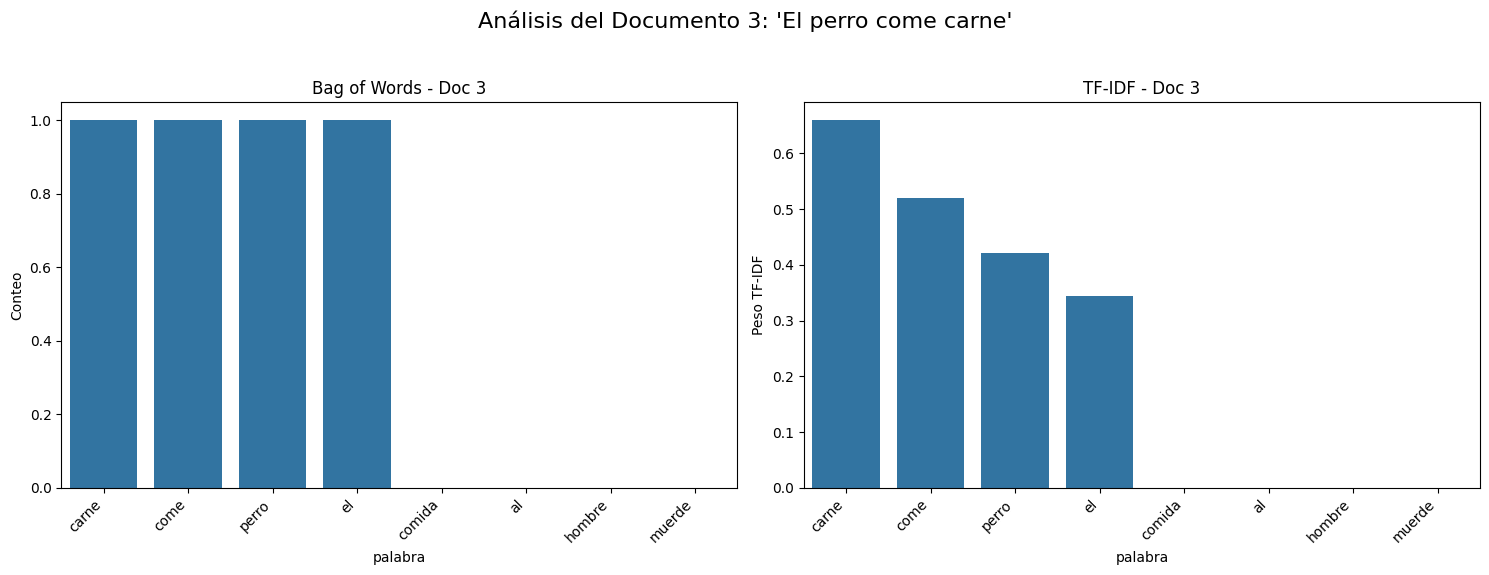


Observaciones:
- En BoW, todas las palabras presentes en el documento ('carne', 'come', 'el', 'perro') tienen un valor de 1.
- En TF-IDF, las palabras 'carne' y 'come' tienen un peso mayor que 'perro' y 'el'.
  Esto ocurre porque 'perro' y 'el' aparecen en más documentos, lo que las hace menos discriminativas (IDF más bajo).
  TF-IDF identifica 'carne' y 'come' como las palabras más importantes para definir este documento en particular.


In [9]:
# --- 3.1. Visualización Comparativa ---
print("\n--- COMPARANDO BoW vs TF-IDF para 'El perro come carne' ---")

# Documento a analizar (índice 2)
doc_idx = 2

# DataFrames para la comparación
df_comp_bow = pd.DataFrame({'palabra': vocab, 'valor': bow_rep[doc_idx].toarray()[0]})
df_comp_tfidf = pd.DataFrame({'palabra': tfidf_vocab, 'valor': tfidf_rep[doc_idx].toarray()[0]})

# Gráfico
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='palabra', y='valor', data=df_comp_bow.sort_values('valor', ascending=False))
plt.title(f'Bag of Words - Doc {doc_idx+1}')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Conteo")

plt.subplot(1, 2, 2)
sns.barplot(x='palabra', y='valor', data=df_comp_tfidf.sort_values('valor', ascending=False))
plt.title(f'TF-IDF - Doc {doc_idx+1}')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Peso TF-IDF")

plt.suptitle(f"Análisis del Documento {doc_idx+1}: '{documentos[doc_idx]}'", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 3.2. Análisis de Resultados ---
print("\nObservaciones:")
print("- En BoW, todas las palabras presentes en el documento ('carne', 'come', 'el', 'perro') tienen un valor de 1.")
print("- En TF-IDF, las palabras 'carne' y 'come' tienen un peso mayor que 'perro' y 'el'.")
print("  Esto ocurre porque 'perro' y 'el' aparecen en más documentos, lo que las hace menos discriminativas (IDF más bajo).")
print("  TF-IDF identifica 'carne' y 'come' como las palabras más importantes para definir este documento en particular.")

## Sección 4: Yendo más allá - N-gramas

### 4.1. Explicación Teórica

Hasta ahora, hemos tratado cada palabra de forma individual (esto se llama usar unigramas). Esto es una limitación, ya que perdemos el significado de términos compuestos como "Buenos Aires" o "inteligencia artificial".

Los N-gramas son secuencias contiguas de N ítems (palabras) de una muestra de texto.

*   **Bigramas (N=2):** Pares de palabras ("Buenos Aires").
*   **Trigramas (N=3):** Tríos de palabras ("Mar del Plata").

Al incluir N-gramas en nuestro vocabulario, podemos capturar estos términos compuestos como si fueran un solo token.

In [10]:
# --- 4.2. Implementación de N-gramas (Versión para principiantes) ---
print("\n--- IMPLEMENTANDO N-GRAMAS ---")

# Corpus con términos compuestos
corpus_ngram = [
    "Buenos Aires es la capital de Argentina",
    "Visité Mar del Plata y Buenos Aires el verano pasado"
]


--- IMPLEMENTANDO N-GRAMAS ---


In [11]:
# ----------------------------------------------------------------
# 1. Problema: Vectorizador estándar (solo unigramas)
# ----------------------------------------------------------------
print("\n1. Analizando con palabras sueltas (Unigramas)")

vectorizer_unigram = CountVectorizer()
X_unigram = vectorizer_unigram.fit_transform(corpus_ngram)

# a) Obtenemos el vocabulario completo generado
vocabulario_completo_unigramas = vectorizer_unigram.get_feature_names_out()

# b) Creamos una lista vacía para guardar solo las palabras que nos interesan
vocabulario_filtrado_unigramas = []

# c) Definimos la lista de palabras que queremos buscar
palabras_a_buscar = ['buenos', 'aires', 'mar', 'del', 'plata']

# d) Recorremos CADA palabra en el vocabulario completo
for palabra in vocabulario_completo_unigramas:
    # e) Nos preguntamos: ¿Está esta 'palabra' en nuestra lista de 'palabras_a_buscar'?
    if palabra in palabras_a_buscar:
        # f) Si la respuesta es sí, la añadimos a nuestra lista filtrada
        vocabulario_filtrado_unigramas.append(palabra)

print("\nVocabulario con Unigramas (extracto):", vocabulario_filtrado_unigramas)
print("-> 'Buenos' y 'Aires' son tokens separados. Se pierde el concepto de la ciudad.")


1. Analizando con palabras sueltas (Unigramas)

Vocabulario con Unigramas (extracto): ['aires', 'buenos', 'del', 'mar', 'plata']
-> 'Buenos' y 'Aires' son tokens separados. Se pierde el concepto de la ciudad.


In [12]:
print("\n\n2. Analizando con Unigramas, Bigramas y Trigramas")

# ngram_range=(1, 3) incluirá tokens de 1, 2 y 3 palabras.
vectorizer_trigram = CountVectorizer(ngram_range=(1, 3))
X_trigram = vectorizer_trigram.fit_transform(corpus_ngram)
vocab_trigram = vectorizer_trigram.get_feature_names_out()

print("\nVocabulario con Uni, Bi y Trigramas (extracto):")
terminos_interes = ['buenos', 'aires', 'buenos aires', 'mar', 'del', 'plata', 'mar del', 'del plata', 'mar del plata']

# a) Creamos una nueva lista vacía
vocabulario_filtrado_ngramas = []

# b) Recorremos CADA término en el nuevo vocabulario (que ahora tiene n-gramas)
for termino in vocab_trigram:
    # c) Nos preguntamos: ¿Está este 'termino' en nuestra lista de 'terminos_interes'?
    if termino in terminos_interes:
        # d) Si la respuesta es sí, lo añadimos a nuestra lista filtrada
        vocabulario_filtrado_ngramas.append(termino)

print(vocabulario_filtrado_ngramas)
print("-> Ahora 'buenos aires' y 'mar del plata' son tokens únicos en nuestro vocabulario.")

# Mostramos la matriz resultante para el segundo documento
df_ngram = pd.DataFrame(X_trigram.toarray(), columns=vocab_trigram, index=["Doc 1", "Doc 2"])
print("\nMatriz de conteo con N-gramas para el Doc 2 (extracto):")
print(df_ngram.loc["Doc 2", terminos_interes])



2. Analizando con Unigramas, Bigramas y Trigramas

Vocabulario con Uni, Bi y Trigramas (extracto):
['aires', 'buenos', 'buenos aires', 'del', 'del plata', 'mar', 'mar del', 'mar del plata', 'plata']
-> Ahora 'buenos aires' y 'mar del plata' son tokens únicos en nuestro vocabulario.

Matriz de conteo con N-gramas para el Doc 2 (extracto):
buenos           1
aires            1
buenos aires     1
mar              1
del              1
plata            1
mar del          1
del plata        1
mar del plata    1
Name: Doc 2, dtype: int64


In [3]:
print("\nObservaciones:")
print("- Con unigramas, 'Buenos' y 'Aires' se tratan como palabras separadas, perdiendo el contexto de la ciudad.")
print("- Con n-gramas, 'Buenos Aires' se reconoce como una sola entidad, preservando su significado.")       




Observaciones:
- Con unigramas, 'Buenos' y 'Aires' se tratan como palabras separadas, perdiendo el contexto de la ciudad.
- Con n-gramas, 'Buenos Aires' se reconoce como una sola entidad, preservando su significado.


## Conclusiones Clave

*   **Vectorizar es Traducir:** Hemos aprendido a "traducir" texto a un formato numérico que las máquinas pueden entender.
*   **BoW es simple y rápido:** Ideal como punto de partida, cuenta la frecuencia de las palabras.
*   **TF-IDF es más inteligente:** Pondera las palabras por su importancia real, dando más peso a los términos específicos y menos a los comunes.
*   **El contexto importa (a veces):** Ambas técnicas ignoran el orden de las palabras, pero los N-gramas nos permiten recuperar parte de ese contexto al tratar términos compuestos como una sola unidad.
*   **Limitación:** Las palabras que no están en el vocabulario aprendido durante el entrenamiento (`fit`) serán ignoradas al procesar texto nuevo (`transform`).

## Glosario de Términos

*   **Corpus:** Una colección de documentos de texto utilizados para entrenar un modelo o realizar un análisis.
*   **Vectorización:** El proceso de convertir texto en vectores numéricos.
*   **Token:** Una unidad de texto, generalmente una palabra o un signo de puntuación.
*   **Vocabulario:** El conjunto de todos los tokens únicos presentes en un corpus.
*   **Bag of Words (BoW):** Un modelo de representación de texto que describe un documento a través del conteo de sus palabras, ignorando el orden.
*   **TF-IDF (Term Frequency-Inverse Document Frequency):** Una métrica numérica que refleja la importancia de una palabra en un documento dentro de una colección o corpus.
*   **N-grama:** Una secuencia contigua de N palabras en un texto. Unigrama (N=1), Bigrama (N=2), Trigrama (N=3).
*   **Matriz Esparsa (Sparse Matrix):** Una matriz en la que la mayoría de los elementos son cero. Es una forma eficiente de almacenar las representaciones vectoriales de texto.